# Einführung in Machine Learning-Methoden

## Libraries

Auflistung aller im Code verwendeten Libraries. 

In [20]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Latex Schriftart Computer Modern Sans serif als Standard einstellen
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
rc('text', usetex=True)

# Bilder in Jupyter Notebook einfügen
from IPython.display import Image 

## Abbildung 3: Aktivierungsfunktionen

1) Schwellenwertfunktion
<br>
\begin{equation}
H(z) = \begin{cases}
1, \ \text{wenn} \ z \geq 0, \\
0, \ \text{sonst}.
\end{cases}
\end{equation}

2) Logistische Funktion
<br>
\begin{equation}
\sigma(z) = \frac{1}{1 + \exp(-z)}
\end{equation}

3) TanH Funktion
<br>
\begin{equation}
tanh(z) = \frac{\exp(2z) - 1}{\exp(2z) + 1} = 2 \sigma(2 z) -1
\end{equation}

4) ReLU Funktion
<br>
\begin{equation}
ReLU(z) = \max(0,z)
\end{equation}

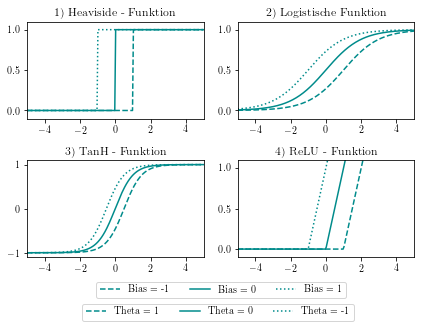

In [38]:
# Abbildung: Aktivierungsfunktionen 

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(-5, 5, 200)
bias1 = -1
bias2 = 1

fig, axs = plt.subplots(2, 2)
# Schwellenwert- oder Heaviside-Funktion
stepwise = (x >= 0).astype(x.dtype)
stepwise_bias1 = (x + bias1 >= 0).astype(x.dtype)
stepwise_bias2 = (x + bias2 >= 0).astype(x.dtype)
axs[0, 0].axis([-5, 5, -0.1, 1.1])
axs[0, 0].plot(x, stepwise_bias1, color="darkcyan", linestyle="--", linewidth=1.5)
axs[0, 0].plot(x , stepwise, color="darkcyan", linewidth=1.5)
axs[0, 0].plot(x, stepwise_bias2, color="darkcyan", linestyle=":", linewidth=1.5)
axs[0, 0].set_title(r'1) Heaviside - Funktion')

# Logistische Funktion
sig = 1 / (1 + np.exp(-x))
sig_bias1 = 1 / (1 + np.exp(-x - bias1))
sig_bias2 = 1 / (1 + np.exp(-x - bias2))
axs[0, 1].axis([-5, 5, -0.1, 1.1])
axs[0, 1].plot(x, sig_bias1, color="darkcyan", linestyle="--", linewidth=1.5)
axs[0, 1].plot(x , sig, color="darkcyan", linewidth=1.5)
axs[0, 1].plot(x, sig_bias2, color="darkcyan", linestyle=":", linewidth=1.5)
axs[0, 1].set_title(r'2) Logistische Funktion')

# Hyperbolic Tangent Function
tanh = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
tanh_bias1 = (np.exp(2*x + bias1) - 1) / (np.exp(2*x + bias1) + 1)
tanh_bias2 = (np.exp(2*x + bias2) - 1) / (np.exp(2*x + bias2) + 1)
axs[1, 0].axis([-5, 5, -1.1, 1.1])
axs[1,0].plot(x, tanh_bias1, color="darkcyan", linestyle="--", linewidth=1.5, label="Bias = -1")
axs[1,0].plot(x , tanh, color="darkcyan", linewidth=1.5, label="Bias = 0")
axs[1,0].plot(x, tanh_bias2, color="darkcyan", linestyle=":", linewidth=1.5, label="Bias = 1")
axs[1,0].set_title(r'3) TanH - Funktion')

# Rectified Linear Unit
relu = np.maximum(0, x)
relu_bias1 = np.maximum(0, x + bias1)
relu_bias2 = np.maximum(0, x + bias2)
axs[1, 1].axis([-5, 5, -0.1, 1.1])
axs[1,1].plot(x, relu_bias1, color="darkcyan", linestyle="--", linewidth=1.5, label="Theta = 1")
axs[1,1].plot(x , relu, color="darkcyan", linewidth=1.5, label = "Theta = 0")
axs[1,1].plot(x, relu_bias2, color="darkcyan", linestyle=":", linewidth=1.5, label = "Theta = -1")
axs[1,1].set_title(r'4) ReLU - Funktion')

handles, labels = axs[1,0].get_legend_handles_labels()
lgd = axs[1,0].legend(handles, labels, loc=9, bbox_to_anchor=(1.1,-0.2), ncol=3,
                      fancybox=True, prop={"family":"Computer Modern Sans serif"})
handles, labels = axs[1,1].get_legend_handles_labels()
lgd = axs[1,1].legend(handles, labels, loc=9, bbox_to_anchor=(-0.11,-0.43), ncol=3,
                      fancybox=True, prop={"family":"Computer Modern Sans serif"})

fig.tight_layout()
#fig.savefig('activation_functions.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## Beispiel: Softmax Funktion (Kapitel 1.2.2)

In [6]:
# Künstliches neuronales Netz mit 4 Output Neuronen und 4 korrespondierenden gewichteten Inputs 

# gewichteten Inputs z = [z_1^(L), z_2^(L), z_3^(L), z_4^(L)] 
z = [-1.0, 0.0, 1.0, 2.0]
# Berechnung des Zählers der Softmax Funktion
exp_z_j = [np.exp(j) for j in z]
# Berechnung des Nenners der Softmax Funktion
sum_exp_z_j = sum(exp_z_j)
# Berechnung der Softmax Funktion
softmax = [j / sum_exp_z_j for j in exp_z_j]
softmax = np.round(softmax, 4)
print(softmax)
sum_softmax = sum(softmax)
print(sum_softmax)

[ 0.0321  0.0871  0.2369  0.6439]
1.0


## Beispiel: Forward Pass (Kapitel 2.1)

In [234]:
# Künstliches neuronales Netz mit zwei Hidden Layers und der Output Layer, wobei die erste
# Hidden Layer vier Neuronen, die zweite Hidden Layer drei Neuronen und die Output Layer 
# ein Neuron besitzt. 

# Setzen eines Seeds aufgrund der zufälligen Initialisierung der Gewichtsmatrizen
np.random.seed(200)
# Logistische Funktion definieren
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Vektorisierte Form der logistischen Funktion (Vereinfachung einer for Schleife)
sigmoid_vectorized = np.vectorize(sigmoid)

# Beobachtung i aus dem Trainingsdatensatz
x = np.array([[1], [2], [3], [4], [5], [6]])
print("Inputvektor x:")
print(x)
print()

# Gewichtsmatrix W_2
W_2 = np.round(np.random.normal(0.0, 1.0, (4,6)), 1) 
print(" Gewichtsmatrix W_2:")
print(W_2)
print()

# Gewichtsmatrix W_3
W_3 = np.round(np.random.normal(0.0, 1.0, (3,4)), 1) 
print("Gewichtsmatrix W_3:")
print(W_3)
print()

# Gewichtsmatrix W_4
W_4 = np.round(np.random.normal(0.0, 1.0, (1,3)), 1) 
print("Gewichtsmatrix W_4:")
print(W_4)
print()

# Gewichteten Inputs aus der Schicht (2)
z_2 = np.round(W_2.dot(x), 1)
print("Gewichtete Inputs z_2:") 
print(z_2)
print()

# Outputs der Neuronen der Schicht (2)
a_2 = np.round(sigmoid_vectorized(z_2), 1)
print("Hidden Output a_2:")
print(a_2)
print()

# Gewichteten Inputs aus der Schicht (3)
z_3 = np.round(W_3.dot(a_2), 1)
print("Gewichtete Inputs z_3:")
print(z_3)
print()

# Outputs der Neuronen der Schicht (3)
a_3 = np.round(sigmoid_vectorized(z_3), 1)
print("Hidden Output a_3:")
print(a_3)
print()

# Gewichteten Inputs aus der Schicht (4)
z_4 = np.round(W_4.dot(a_3), 1)
print("Gewichtete Inputs z_4:")
print(z_4)
print()

# Outputs der Neuronen der Schicht (4) = Schätzungen
y_hat = np.round(sigmoid_vectorized(z_4), 4)
print("Schätzung y_hat:")
print(y_hat)

Inputvektor x:
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

 Gewichtsmatrix W_2:
[[-1.5  1.9  0.7 -0.2  0.4 -0. ]
 [-0.2  0.5 -0.7  0.8  0.1  1.3]
 [ 0.2  1.   1.9 -0.5  1.8 -1.1]
 [-0.9  0.2 -1.2  1.2 -1.3  0.8]]

Gewichtsmatrix W_3:
[[-0.3 -1.3  0.2  2.1]
 [-0.2  0.3  0.7 -0.7]
 [ 0.2  2.2 -0.7 -1. ]]

Gewichtsmatrix W_4:
[[ 2.3  0.6  0.6]]

Gewichtete Inputs z_2:
[[  5.6]
 [ 10.2]
 [  8.3]
 [ -1. ]]

Hidden Output a_2:
[[ 1. ]
 [ 1. ]
 [ 1. ]
 [ 0.3]]

Gewichtete Inputs z_3:
[[-0.8]
 [ 0.6]
 [ 1.4]]

Hidden Output a_3:
[[ 0.3]
 [ 0.6]
 [ 0.8]]

Gewichtete Inputs z_4:
[[ 1.5]]

Schätzung y_hat:
[[ 0.8176]]


## Analyse des MNIST Datensatzes

### Einlesen des MNIST Datensatzes und Aufteilung in Trainings- Validierungs- und Testdatensatz

In [2]:
# Einlesen des MNIST Datensatzes im CSV Format 
# Daten erhältich auf der Website: http://pjreddie.com/projects/mnist-in-csv/

# Pfade definieren, welcher die Dateien des MNIST Trainings- und Testdatensatz enthalten
train_file = '/Users/annamenacher/Bachelorarbeit/MNIST_Daten/mnist_train.csv'
test_file = '/Users/annamenacher/Bachelorarbeit/MNIST_Daten/mnist_test.csv'

# Einlesen der Dateien
train = np.loadtxt(train_file, delimiter=',')
test = np.loadtxt(test_file, delimiter=',')

# Trennung des ursprünglichen MNIST Trainingsdatensatzes in einen Trainings- und 
# Validierungsdatensatz + Trennung der Datensätze in Inputs X und Labels y 
# stratify: gleichmäßige Aufteilung der Klassen im Trainings- und Validierungsdatensatz
X_train, X_val, y_train, y_val = train_test_split(train[:,1:785], train[:,:1], 
                                                  test_size=0.16666, random_state=42, 
                                                  stratify=train[:,:1])

# Trennung des Testdatensatzes in Inputs X und Labels y 
X_test = test[:,1:785]
y_test = test[:,:1]

### Visualisierung einer Ziffer des MNIST Datensatzes

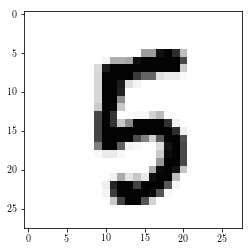

In [3]:
# Abbildung der zweiten Zahl des Trainingsdatensatzes

# Umformung der 784 Input Variablen in ein Bild mit 28 x 28 Pixel

image1 = X_train[1].reshape((28,28))

# cmap = "Greys": Verwendung der Graustufenpalette (Wertebereich zwischen 0 (weiß) und 
#                 255 (schwarz))

# interpolation = "None": keine Interpolation der Pixel -> verpixelte Orginaldarstellung
#                         der Bilder

matplotlib.pyplot.imshow(image1, cmap = "Greys", interpolation = "None")

### Abbildung 5: Beispielhafte Zahlen des MNIST Datensatzes

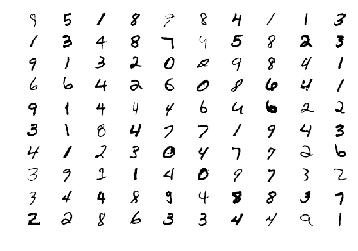

In [32]:
# Definition einer Funktion, welche 100 Suplots von Bildern mit 28 x 28 Pixel erstellt 

def plot_mnist_images(inputs):
    
    # 10 x 10 Plots erstellen
    fig, axes = plt.subplots(10, 10)
    fig.subplots_adjust(hspace=0.3, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Abbildung eines MNIST Bildes
        ax.imshow(inputs[i].reshape((28,28)), cmap= "Greys", interpolation = "None")
        
        # Achsen und Ränder aus den Abbildungen entfernen
        ax.axis("off")

    plt.show()
    #fig.savefig('mnist_images.pdf')
    
# Daten für die Abbildung der ersten 100 MNIST Bilder aus dem Trainingsdatensatz
images = X_train[0:100]

# Abbildung der ersten 100 MNIST Bilder aus dem Trainingsdatensatz
plot_mnist_images(inputs=images)

### Aufbereitung der Eingabewerte

#### Datenpunkt vor Skalierung der Inputs

In [33]:
# Inputs der zweite Beobachtung des Trainingsdatensatzes
X_train[1]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

#### Skalierung der Eingabewerte des Trainings-, Validierungs- und Testdatensatzes

In [3]:
# Skalierung der Inputs um den Faktor 1/255 
# Lineare Transformation der Variablen von einem Wertebereich [0,255] auf den Wertebereich [0,1]

### ACHTUNG: Auf jeden Fall nur EINMAL in einer Sitzung ausführen! 
###          Ansonsten werden die Variablen mehrmals skaliert!

X_train /= 255
X_val /= 255
X_test /= 255

#### Datenpunkt nach der Skalierung der Inputs

In [35]:
# Inputs der zweite Beobachtung des Trainingsdatensatzes
X_train[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

#### Dimensionen der Datenmatrizen X 

In [25]:
# Dimensionen der Inputs X des jeweiligen Datensatzes überprüfen
print("Größe der Datenmatrix X des:")
print("- Trainingsdatensatzes:\t\t{}".format(X_train.shape))
print("- Validierungsdatensatzes:\t{}".format(X_val.shape))
print("- Testdatensatzes:\t\t{}".format(X_test.shape))

Größe der Datenmatrix X des:
- Trainingsdatensatzes:		(50000, 784)
- Validierungsdatensatzes:	(10000, 784)
- Testdatensatzes:		(10000, 784)


### Aufbereitung der Ausgabewerte

#### Label bevor One-Hot Encoding

In [37]:
# Label der zweite Beobachtung des Trainingsdatensatzes
y_train[1]

array([ 5.])

#### One-Hot Encoding der Labels des Trainings-, Validierungs- und Testdatensatz

In [4]:
# Transformation der Labels y in einen One-Hot Vektor der Länge 10
one_hot = preprocessing.OneHotEncoder()

one_hot.fit(y_train)
y_train = one_hot.transform(y_train).toarray()

one_hot.fit(y_val)
y_val = one_hot.transform(y_val).toarray()

one_hot.fit(y_test)
y_test = one_hot.transform(y_test).toarray()

#### Label nach One-Hot Encoding

In [40]:
# One-Hot Vektor des Labels y der zweite Beobachtung des Trainingsdatensatzes
y_train[1]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

#### Dimensionen der Matrizen der gewünschten Outputs y

In [41]:
# Dimensionen der gewünschten Outputs y des jeweiligen Datensatzes überprüfen
print("Größe der Matrix y des:")
print("- Trainingsdatensatzes:\t\t{}".format(y_train.shape))
print("- Validierungsdatensatzes:\t{}".format(y_val.shape))
print("- Testdatensatzes:\t\t{}".format(y_test.shape))

Größe der Matrix y des:
- Trainingsdatensatzes:		(50000, 10)
- Validierungsdatensatzes:	(10000, 10)
- Testdatensatzes:		(10000, 10)


### Hyperparameter

An dieser Stelle werden verschiedene Hyperparameter eines künstlichen neuronalen Netzes ausprobiert. 

In [1]:
# Ausführung dieser Zelle nur, wenn der Kernel des Jupyter Notebooks neu gestartet wurde!
# Zusammenfassung der obigen Schritte in einer Zelle, d.h. Einlesen und Aufbereitung der Daten.

# Libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
rc('text', usetex=True)
from IPython.display import Image 

# Datensätze
train_file = '/Users/annamenacher/Bachelorarbeit/MNIST_Daten/mnist_train.csv'
test_file = '/Users/annamenacher/Bachelorarbeit/MNIST_Daten/mnist_test.csv'

train = np.loadtxt(train_file, delimiter=',').astype(np.float32)
test = np.loadtxt(test_file, delimiter=',').astype(np.float32)

X_train, X_val, y_train, y_val = train_test_split(train[:,1:785], train[:,:1],
                                                  test_size=0.16666, random_state=42, 
                                                  stratify=train[:,:1])
X_test = test[:,1:785]
y_test = test[:,:1]

X_train /= 255
X_val /= 255
X_test /= 255

one_hot = preprocessing.OneHotEncoder()

one_hot.fit(y_train)
y_train = one_hot.transform(y_train).toarray()

one_hot.fit(y_val)
y_val = one_hot.transform(y_val).toarray()

one_hot.fit(y_test)
y_test = one_hot.transform(y_test).toarray()

Allgemein: fetch_batch( )

- epoch: Epoche
<br>
- i: Iteration
<br>
- batch_size: Größe eines Batches $n_m$
<br>
- n_batches: Anzahl der Iterationen $m$, die notwendig sind, um eine Epoche zu vervollständigen
<br>
- n_dataset: Anzahl der Beobachtungen im Datensatz
<br>
- X_dataset: Inputs $\textbf{X}$ eines Datensatzes
<br>
- y_dataset: Labels $\textbf{y}$ eines Datensatzes

In [2]:
def fetch_batch(epoch, i, batch_size, n_batches, n_dataset, X_dataset, y_dataset):
    np.random.seed(epoch * n_batches + i)
    indices = np.random.randint(n_dataset, size = batch_size)
    X_batch = X_dataset[indices]
    y_batch = y_dataset[indices]
    return X_batch, y_batch

Allgemein: TensorFlow

TensorFlow ist eine Library, welche einen in Python definierten $\textit{computational graph}$ in Form von effizienterem C++ Code ausführt. Somit werden während der Definition eines $\textit{computational graph}$ keine Berechnungen ausgeführt. Erst am Ende erfolgt der Befehl den Graphen auszuführen, wodurch die Variablen initialisiert und die Berechnungnen durchführt werden.

Allgemein: TensorBoard

Beim Ausführen der Funktion neural_network_graph( ) werden sogenannte Log-Daten für die Visualisierung der Graphenstruktur, Performance usw. erstellt. Hierbei darf sich sowohl bei der Erstellung als auch bei der Initialisierung von TensorBoard jeweils nur eine Log-Datei in einem Ordner befinden, d.h. im Folgenden indiziert der Pfad "/Users/annamenacher/Bachelorarbeit/TensorBoard/hidden_layers/modell1" den Speicherort für die Log-Datei des Modells 1 im Ordner Modell 1. Um alle vier Modelle in einer TensorBoard Session zu visualisieren wird später der Parent Folder abgefragt, d.h. der Pfad "/Users/annamenacher/Bachelorarbeit/TensorBoard/hidden_layers", welche vier Sub Folder für jedes der Modelle enthält.

Allgemein: Visualisierung mit matplotlib

Während die Ordner für die Speicherung der Log-Daten von TensorBoard automatisch erstellt werden, muss der Ordner für die Speicherung der txt Files zur Visualisierung mit matplotlib vor der Durchführung des Codes erstellt werden. Hier wurde der Order txt_files mit folgendem Pfad erstellt: /Users/annamenacher/Bachelorarbeit/txt_files/.

Anmerkung: 

Der Code zur Definition eines Netzwerk Graphen wurde basierend auf folgenden Tutorials erstellt:

- Hands-On Machine Learning with SciKit-Learn & TensorFlow (vgl. Géron, 2017, Kapitel 9):
<br>
https://github.com/ageron/handson-ml/blob/master/09_up_and_running_with_tensorflow.ipynb
<br>
- Adventures in Machine Learning (TensorFlow Tutorial):
<br>
https://github.com/adventuresinML/adventures-in-ml-code/blob/master/tensor_flow_tutorial.py
<br>
- TensorFlow Summit 2017 (TensorBoard Tutorial): 
<br>
https://github.com/decentralion/tf-dev-summit-tensorboard-tutorial/blob/master/mnist.py

#### Anzahl der Hidden Layers und Neuronen

Im Folgenden werden vier unterschiedliche Netzwerkarchitekturen von künstlichen neuronalen Netzen c.p. verglichen. Die restlichen Hyperparameter sind somit folgendermaßen definiert:

- Lernrate: 0,3
- Optimierungsverfahren: Mini-Batch Gradient Descent
- Kostenfunktion: Cross-Entropy Fehler
- Batch Größe: 100
- Aktivierungsfunktion (Hidden Layer): Logistische Funktion
- Aktivierungsfunktion (Output Layer): Softmax Funktion
- Anzahl an Epochen: 100
- Initialisierung der Gewichte: Normalverteilung mit $\mu = 0,0$ und $\sigma = 0,05$ 
- Initialisierung der Biaswerte: Nullen

$\textbf{Modell 1:}$

Zweischichtiges künstliches neuronales Netz mit 500 Neuronen in der 1. Hidden Layer und Verwendung der logistischen Funktion als Aktivierungsfunktion

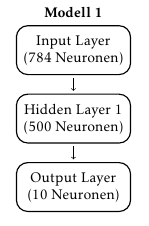

In [4]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "hidden_layers/modell1"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.0441, Accuracy: 0.4564
Epoch: 20, Cross-Entropy Fehler: 1.6360, Accuracy: 0.8335
Epoch: 30, Cross-Entropy Fehler: 1.6190, Accuracy: 0.8464
Epoch: 40, Cross-Entropy Fehler: 1.6109, Accuracy: 0.8535
Epoch: 50, Cross-Entropy Fehler: 1.6035, Accuracy: 0.8610
Epoch: 60, Cross-Entropy Fehler: 1.6005, Accuracy: 0.8635
Epoch: 70, Cross-Entropy Fehler: 1.5941, Accuracy: 0.8701
Epoch: 80, Cross-Entropy Fehler: 1.5928, Accuracy: 0.8711
Epoch: 90, Cross-Entropy Fehler: 1.5883, Accuracy: 0.8752
Epoch: 100, Cross-Entropy Fehler: 1.5863, Accuracy: 0.8771

Training beendet!
0.8662


$\textbf{Modell 2:}$

Zweischichtiges künstliches neuronales Netz mit 800 Neuronen in der 1. Hidden Layer und Verwendung der logistischen Funktion als Aktivierungsfunktion

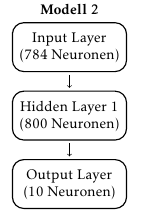

In [4]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "hidden_layers/modell2"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 800], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [800]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([800, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 1.9588, Accuracy: 0.5677
Epoch: 20, Cross-Entropy Fehler: 1.7108, Accuracy: 0.7553
Epoch: 30, Cross-Entropy Fehler: 1.7011, Accuracy: 0.7637
Epoch: 40, Cross-Entropy Fehler: 1.6995, Accuracy: 0.7641
Epoch: 50, Cross-Entropy Fehler: 1.6317, Accuracy: 0.8352
Epoch: 60, Cross-Entropy Fehler: 1.6226, Accuracy: 0.8431
Epoch: 70, Cross-Entropy Fehler: 1.6136, Accuracy: 0.8514
Epoch: 80, Cross-Entropy Fehler: 1.6101, Accuracy: 0.8549
Epoch: 90, Cross-Entropy Fehler: 1.6055, Accuracy: 0.8592
Epoch: 100, Cross-Entropy Fehler: 1.6020, Accuracy: 0.8623

Training beendet!
0.8526


$\textbf{Modell 3:}$

Dreischichtiges künstliches neuronales Netz mit 300 Neuronen in der 1. Hidden Layer und 200 Neuronen in der 2. Hidden Layer mit Verwendung der logistischen Funktion als Aktivierungsfunktion

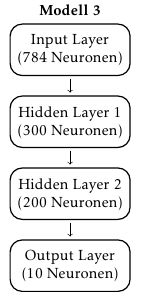

In [9]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "hidden_layers/modell3"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 300], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [300]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Hidden Layer 2
    with tf.name_scope("Hidden_Layer_2"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([300, 200], mean=0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [200]), name = 'b2')
        # gewichtete Inputs: z =  a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # Outputs der Hidden Layer: a = f(z)
        a2 = tf.nn.sigmoid(z2)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W3 = tf.Variable(tf.random_normal([200, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W3')
        # Initialisierung der Biaswerte: Nullen
        b3 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b3')
        # gewichtete Inputs: z = a * W + b
        z3 = tf.add(tf.matmul(a2, W3), b3)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z3)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.2884, Accuracy: 0.1372
Epoch: 20, Cross-Entropy Fehler: 1.7093, Accuracy: 0.7566
Epoch: 30, Cross-Entropy Fehler: 1.6156, Accuracy: 0.8514
Epoch: 40, Cross-Entropy Fehler: 1.5459, Accuracy: 0.9249
Epoch: 50, Cross-Entropy Fehler: 1.5247, Accuracy: 0.9434
Epoch: 60, Cross-Entropy Fehler: 1.5164, Accuracy: 0.9498
Epoch: 70, Cross-Entropy Fehler: 1.5047, Accuracy: 0.9617
Epoch: 80, Cross-Entropy Fehler: 1.5012, Accuracy: 0.9648
Epoch: 90, Cross-Entropy Fehler: 1.4958, Accuracy: 0.9699
Epoch: 100, Cross-Entropy Fehler: 1.4921, Accuracy: 0.9730

Training beendet!
0.9635


$\textbf{Modell 4:}$

Vierschichtiges künstliches neuronales Netz mit 300 Neuronen in der 1. Hidden Layer, 200 Neuronen in der 2. Hidden Layer und 100 Neuronen in der 3. Hidden Layer mit Verwendung der logistischen Funktion als Aktivierungsfunktion

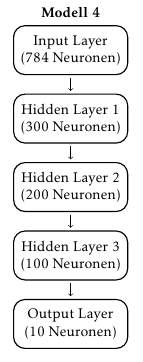

In [10]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "hidden_layers/modell4"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 300], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [300]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Hidden Layer 2
    with tf.name_scope("Hidden_Layer_2"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([300, 200], mean=0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [200]), name = 'b2')
        # gewichtete Inputs: z =  a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # Outputs der Hidden Layer: a = f(z)
        a2 = tf.nn.sigmoid(z2)
    
    # Hidden Layer 3
    with tf.name_scope("Hidden_Layer_3"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W3 = tf.Variable(tf.random_normal([200, 100], mean=0.0, stddev = 0.05, seed=123), name = 'W3')
        # Initialisierung der Biaswerte: Nullen
        b3 = tf.Variable(tf.constant(0.0, shape = [100]), name = 'b3')
        # gewichtete Inputs: z =  a * W + b
        z3 = tf.add(tf.matmul(a2, W3), b3)
        # Outputs der Hidden Layer: a = f(z)
        a3 = tf.nn.sigmoid(z3)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W4 = tf.Variable(tf.random_normal([100, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W4')
        # Initialisierung der Biaswerte: Nullen
        b4 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b4')
        # gewichtete Inputs: z = a * W + b
        z4 = tf.add(tf.matmul(a3, W4), b4)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z4)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.3013, Accuracy: 0.1117
Epoch: 20, Cross-Entropy Fehler: 1.9466, Accuracy: 0.5402
Epoch: 30, Cross-Entropy Fehler: 1.7209, Accuracy: 0.7470
Epoch: 40, Cross-Entropy Fehler: 1.7011, Accuracy: 0.7621
Epoch: 50, Cross-Entropy Fehler: 1.6898, Accuracy: 0.7727
Epoch: 60, Cross-Entropy Fehler: 1.6814, Accuracy: 0.7807
Epoch: 70, Cross-Entropy Fehler: 1.6789, Accuracy: 0.7824
Epoch: 80, Cross-Entropy Fehler: 1.6754, Accuracy: 0.7853
Epoch: 90, Cross-Entropy Fehler: 1.6685, Accuracy: 0.7922
Epoch: 100, Cross-Entropy Fehler: 1.6682, Accuracy: 0.7920

Training beendet!
0.784


$\textbf{TensorBoard:}$
<br>
Visualisierung des Cross-Entropy Fehlers und Accuracy des Trainings- und Validierungsdatensatzes mit TensorBoard
<br>
(Um TensorBoard zu schließen (notwendig zum Fortsetzen des Jupyter Notebooks) die untere Zelle auswählen und Kernel -> Interrupt auswählen.)

In [ ]:
!tensorboard --logdir=/Users/annamenacher/Bachelorarbeit/TensorBoard/hidden_layers

Die Visualisierung der Werte der Kostenfunktion sowie des Performance-Maßes Accuracy erfolgt über TensorBoard. In TensorBoard besteht aber zudem die Möglichkeit die Log-Daten als CSV Dateien herunterzuladen, um sie für die Visualisierung mit anderen Libraries, wie z.b. matplotlib, zu verwenden. An dieser Stelle wird aber darauf verzichtet, da im Code bereits txt-Files mit den gleichen Werten erstellt wurden.

$\textbf{Visualisierung mit matplotlib:}$

In [5]:
# Pfade definieren, welcher die txt-Dateien enthalten

# Accuracy (Validierung)
acc_val_1_file = '/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell1_val_acc.txt'
acc_val_2_file = '/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell2_val_acc.txt'
acc_val_3_file = '/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell3_val_acc.txt'
acc_val_4_file = '/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell4_val_acc.txt'
# Cross-Entropy (Validierung)
ce_val_1_file = "/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell1_val_ce.txt"
ce_val_2_file = "/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell2_val_ce.txt"
ce_val_3_file = "/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell3_val_ce.txt"
ce_val_4_file = "/Users/annamenacher/Bachelorarbeit/txt_files/hidden_layers/modell4_val_ce.txt"

# Einlesen der Dateien

# Accuracy (Validierung)
acc_val_1 = np.loadtxt(acc_val_1_file, delimiter=',')
acc_val_2 = np.loadtxt(acc_val_2_file, delimiter=',')
acc_val_3 = np.loadtxt(acc_val_3_file, delimiter=',')
acc_val_4 = np.loadtxt(acc_val_4_file, delimiter=',')
# Cross-Entropy (Validierung)
ce_val_1 = np.loadtxt(ce_val_1_file, delimiter=',')
ce_val_2 = np.loadtxt(ce_val_2_file, delimiter=',')
ce_val_3 = np.loadtxt(ce_val_3_file, delimiter=',')
ce_val_4 = np.loadtxt(ce_val_4_file, delimiter=',')

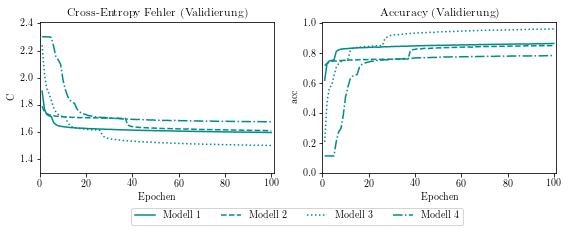

In [7]:
# Kostenfunktion und Accuracy des Validierungsdatensatzes bei unterschiedlichen 
# Netzwerkarchitekturen 

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 3))

epochs = np.arange(1,101,1)

ax1.axis([0, 101,1.3,2.41])
ax1.set_xlabel("Epochen")
ax1.set_ylabel("C")
ax1.plot(np.array(epochs), np.array(ce_val_1), color="darkcyan", linewidth=1.5, label="Modell 1")
ax1.plot(np.array(epochs), np.array(ce_val_2), color="darkcyan", linestyle="--", linewidth=1.5, label="Modell 2")
ax1.plot(np.array(epochs), np.array(ce_val_3), color="darkcyan", linestyle=":", linewidth=1.5, label="Modell 3")
ax1.plot(np.array(epochs), np.array(ce_val_4), color="darkcyan", linestyle="-.", linewidth=1.5, label="Modell 4")
ax1.set_title(r'Cross-Entropy Fehler (Validierung)')

ax2.axis([0, 101, 0, 1.01])
ax2.set_xlabel("Epochen")
ax2.set_ylabel("acc")
ax2.plot(np.array(epochs), np.array(acc_val_1), color="darkcyan", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_2), color="darkcyan", linestyle="--", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_3), color="darkcyan", linestyle=":", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_4), color="darkcyan", linestyle="-.", linewidth=1.5)
ax2.set_title(r'Accuracy (Validierung)')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc=9, bbox_to_anchor=(1.1,-0.2), ncol=4,
                      fancybox=True, prop={"family":"Computer Modern Sans serif"})

fig.tight_layout()
#fig.savefig('hidden_layers_acc_ce.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

#### Aktivierungsfunktionen

Im Folgenden werden drei unterschiedliche Aktivierungsfunktionen von Neuronen der Hidden Layers in einem künstlichen neuronalen Netz (Netzwerkarchitektur von Modell 1) c.p. verglichen. Die restlichen Hyperparameter sind somit folgendermaßen definiert:

- Anzahl der Hidden Layers: 1
- Anzahl der Neuronen in der 1. Hidden Layer: 500
- Lernrate: 0,3
- Optimierungsverfahren: Mini-Batch Gradient Descent
- Kostenfunktion: Cross-Entropy Fehler
- Batch Größe: 100
- Aktivierungsfunktion (Output Layer): Softmax Funktion
- Anzahl an Epochen: 100
- Initialisierung der Gewichte: Normalverteilung mit $\mu = 0,0$ und $\sigma = 0,05$ 
- Initialisierung der Biaswerte: Nullen

$\textbf{Logisitsche Funktion:}$

In [11]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "activation_functions/sigmoid"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.0441, Accuracy: 0.4564
Epoch: 20, Cross-Entropy Fehler: 1.6360, Accuracy: 0.8335
Epoch: 30, Cross-Entropy Fehler: 1.6190, Accuracy: 0.8464
Epoch: 40, Cross-Entropy Fehler: 1.6109, Accuracy: 0.8535
Epoch: 50, Cross-Entropy Fehler: 1.6035, Accuracy: 0.8610
Epoch: 60, Cross-Entropy Fehler: 1.6005, Accuracy: 0.8635
Epoch: 70, Cross-Entropy Fehler: 1.5941, Accuracy: 0.8701
Epoch: 80, Cross-Entropy Fehler: 1.5928, Accuracy: 0.8711
Epoch: 90, Cross-Entropy Fehler: 1.5883, Accuracy: 0.8752
Epoch: 100, Cross-Entropy Fehler: 1.5863, Accuracy: 0.8771

Training beendet!
0.8662


$\textbf{TanH Funktion:}$

In [12]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "activation_functions/tanh"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.tanh(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 1.6698, Accuracy: 0.8361
Epoch: 20, Cross-Entropy Fehler: 1.5175, Accuracy: 0.9502
Epoch: 30, Cross-Entropy Fehler: 1.4971, Accuracy: 0.9688
Epoch: 40, Cross-Entropy Fehler: 1.4894, Accuracy: 0.9759
Epoch: 50, Cross-Entropy Fehler: 1.4833, Accuracy: 0.9815
Epoch: 60, Cross-Entropy Fehler: 1.4790, Accuracy: 0.9851
Epoch: 70, Cross-Entropy Fehler: 1.4757, Accuracy: 0.9875
Epoch: 80, Cross-Entropy Fehler: 1.4753, Accuracy: 0.9878
Epoch: 90, Cross-Entropy Fehler: 1.4734, Accuracy: 0.9894
Epoch: 100, Cross-Entropy Fehler: 1.4722, Accuracy: 0.9902

Training beendet!
0.9739


$\textbf{ReLU Funktion:}$

In [13]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "activation_functions/relu"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.relu(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 1.7188, Accuracy: 0.7848
Epoch: 20, Cross-Entropy Fehler: 1.5014, Accuracy: 0.9661
Epoch: 30, Cross-Entropy Fehler: 1.4836, Accuracy: 0.9823
Epoch: 40, Cross-Entropy Fehler: 1.4776, Accuracy: 0.9870
Epoch: 50, Cross-Entropy Fehler: 1.4743, Accuracy: 0.9893
Epoch: 60, Cross-Entropy Fehler: 1.4722, Accuracy: 0.9908
Epoch: 70, Cross-Entropy Fehler: 1.4700, Accuracy: 0.9924
Epoch: 80, Cross-Entropy Fehler: 1.4702, Accuracy: 0.9921
Epoch: 90, Cross-Entropy Fehler: 1.4692, Accuracy: 0.9928
Epoch: 100, Cross-Entropy Fehler: 1.4684, Accuracy: 0.9935

Training beendet!
0.9764


$\textbf{TensorBoard:}$
<br>
Nach dem Anschauen des TensorBoard nicht vergessen den Kernel zu unterbrechen (Kernel -> Interrupt).

In [ ]:
!tensorboard --logdir=/Users/annamenacher/Bachelorarbeit/TensorBoard/activation_functions

$\textbf{Visualisierung mit matplotlib:}$

In [8]:
# Pfade definieren, welcher die txt-Dateien enthalten

# Accuracy (Validierung)
acc_val_1_file = '/Users/annamenacher/Bachelorarbeit/txt_files/activation_functions/sigmoid_val_acc.txt'
acc_val_2_file = '/Users/annamenacher/Bachelorarbeit/txt_files/activation_functions/tanh_val_acc.txt'
acc_val_3_file = '/Users/annamenacher/Bachelorarbeit/txt_files/activation_functions/relu_val_acc.txt'
# Cross-Entropy (Validierung)
ce_val_1_file = "/Users/annamenacher/Bachelorarbeit/txt_files/activation_functions/sigmoid_val_ce.txt"
ce_val_2_file = "/Users/annamenacher/Bachelorarbeit/txt_files/activation_functions/tanh_val_ce.txt"
ce_val_3_file = "/Users/annamenacher/Bachelorarbeit/txt_files/activation_functions/relu_val_ce.txt"

# Einlesen der Dateien

# Accuracy (Validierung)
acc_val_1 = np.loadtxt(acc_val_1_file, delimiter=',')
acc_val_2 = np.loadtxt(acc_val_2_file, delimiter=',')
acc_val_3 = np.loadtxt(acc_val_3_file, delimiter=',')
# Cross-Entropy (Validierung)
ce_val_1 = np.loadtxt(ce_val_1_file, delimiter=',')
ce_val_2 = np.loadtxt(ce_val_2_file, delimiter=',')
ce_val_3 = np.loadtxt(ce_val_3_file, delimiter=',')

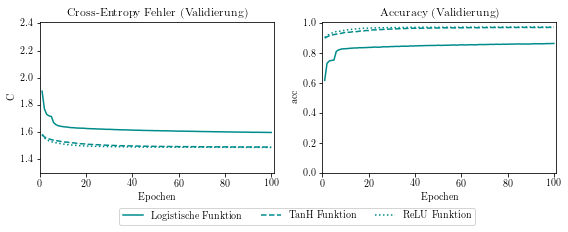

In [9]:
# Kostenfunktion und Accuracy des Validierungsdatensatzes bei unterschiedlichen 
# Aktivierungsfunktionen

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 3))

epochs = np.arange(1,101,1)

ax1.axis([0, 101,1.3,2.41])
ax1.set_xlabel("Epochen")
ax1.set_ylabel("C")
ax1.plot(np.array(epochs), np.array(ce_val_1), color="darkcyan", linewidth=1.5, label="Logistische Funktion")
ax1.plot(np.array(epochs), np.array(ce_val_2), color="darkcyan", linestyle="--", linewidth=1.5, label="TanH Funktion")
ax1.plot(np.array(epochs), np.array(ce_val_3), color="darkcyan", linestyle=":", linewidth=1.5, label="ReLU Funktion")
ax1.set_title(r'Cross-Entropy Fehler (Validierung)')

ax2.axis([0, 101, 0, 1.01])
ax2.set_xlabel("Epochen")
ax2.set_ylabel("acc")
ax2.plot(np.array(epochs), np.array(acc_val_1), color="darkcyan", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_2), color="darkcyan", linestyle="--", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_3), color="darkcyan", linestyle=":", linewidth=1.5)
ax2.set_title(r'Accuracy (Validierung)')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc=9, bbox_to_anchor=(1.1,-0.2), ncol=3,
                      fancybox=True, prop={"family":"Computer Modern Sans serif"})

fig.tight_layout()
#fig.savefig('activation_functions_acc_ce.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

#### Lernrate

Im Folgenden werden vier unterschiedliche Lernraten von künstlichen neuronalen Netzen (Netzwerkarchitektur von Modell 1) c.p. verglichen. Die restlichen Hyperparameter sind somit folgendermaßen definiert:

- Anzahl der Hidden Layers: 1
- Anzahl der Neuronen in der 1. Hidden Layer: 500
- Optimierungsverfahren: Mini-Batch Gradient Descent
- Kostenfunktion: Cross-Entropy Fehler
- Batch Größe: 100
- Aktivierungsfunktion (Hidden Layer): Logistische Funktion
- Aktivierungsfunktion (Output Layer): Softmax Funktion
- Anzahl an Epochen: 100
- Initialisierung der Gewichte: Normalverteilung mit $\mu = 0,0$ und $\sigma = 0,05$ 
- Initialisierung der Biaswerte: Nullen

$\textbf{Lernrate = 0,1:}$

In [14]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "learning_rate/lernrate=0.1"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.1
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.1726, Accuracy: 0.3407
Epoch: 20, Cross-Entropy Fehler: 1.7198, Accuracy: 0.7533
Epoch: 30, Cross-Entropy Fehler: 1.6511, Accuracy: 0.8278
Epoch: 40, Cross-Entropy Fehler: 1.6328, Accuracy: 0.8379
Epoch: 50, Cross-Entropy Fehler: 1.6251, Accuracy: 0.8436
Epoch: 60, Cross-Entropy Fehler: 1.6222, Accuracy: 0.8453
Epoch: 70, Cross-Entropy Fehler: 1.6178, Accuracy: 0.8489
Epoch: 80, Cross-Entropy Fehler: 1.6177, Accuracy: 0.8482
Epoch: 90, Cross-Entropy Fehler: 1.6133, Accuracy: 0.8525
Epoch: 100, Cross-Entropy Fehler: 1.6113, Accuracy: 0.8543

Training beendet!
0.8469


$\textbf{Lernrate = 0,2}:$

In [15]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "learning_rate/lernrate=0.2"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.2
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.0939, Accuracy: 0.4087
Epoch: 20, Cross-Entropy Fehler: 1.6506, Accuracy: 0.8262
Epoch: 30, Cross-Entropy Fehler: 1.6264, Accuracy: 0.8414
Epoch: 40, Cross-Entropy Fehler: 1.6186, Accuracy: 0.8469
Epoch: 50, Cross-Entropy Fehler: 1.6117, Accuracy: 0.8541
Epoch: 60, Cross-Entropy Fehler: 1.6091, Accuracy: 0.8555
Epoch: 70, Cross-Entropy Fehler: 1.6033, Accuracy: 0.8618
Epoch: 80, Cross-Entropy Fehler: 1.6028, Accuracy: 0.8617
Epoch: 90, Cross-Entropy Fehler: 1.5978, Accuracy: 0.8669
Epoch: 100, Cross-Entropy Fehler: 1.5957, Accuracy: 0.8686

Training beendet!
0.859


$\textbf{Lernrate = 0,3:}$

In [16]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "learning_rate/lernrate=0.3"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.3
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 2.0441, Accuracy: 0.4564
Epoch: 20, Cross-Entropy Fehler: 1.6360, Accuracy: 0.8335
Epoch: 30, Cross-Entropy Fehler: 1.6190, Accuracy: 0.8464
Epoch: 40, Cross-Entropy Fehler: 1.6109, Accuracy: 0.8535
Epoch: 50, Cross-Entropy Fehler: 1.6035, Accuracy: 0.8610
Epoch: 60, Cross-Entropy Fehler: 1.6005, Accuracy: 0.8635
Epoch: 70, Cross-Entropy Fehler: 1.5941, Accuracy: 0.8701
Epoch: 80, Cross-Entropy Fehler: 1.5928, Accuracy: 0.8711
Epoch: 90, Cross-Entropy Fehler: 1.5883, Accuracy: 0.8752
Epoch: 100, Cross-Entropy Fehler: 1.5863, Accuracy: 0.8771

Training beendet!
0.8662


$\textbf{Lernrate = 0,4:}$

In [17]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfade für unterschiedliche Hyperparameter
    hyperparameter = "learning_rate/lernrate=0.4"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.4
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_val bzw. y_val über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Validierungs-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 500], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [500]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.sigmoid(z1)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([500, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b2')
        # gewichtete Inputs: z = a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z2)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_val_ce = tf.summary.scalar("Cross_Entropy_Validierung", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_val_acc = tf.summary.scalar("Accuracy_Validierung", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_val = []
        acc_train = []
        acc_val = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Validierungsdatensatzes
            val_summ1, val_summ2 = sess.run([summ_val_ce, summ_val_acc],
                                            feed_dict={X : X_val, y : y_val})
            writer.add_summary(val_summ1, epoch)
            writer.add_summary(val_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Validierungsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_val = sess.run(cross_entropy, feed_dict = {X: X_val, y: y_val})
            accuracy_val = sess.run(accuracy, feed_dict = {X: X_val, y: y_val})
            
            # Befüllung der zuvor leeren Liste
            ce_val.append(cross_entropy_val)
            acc_val.append(accuracy_val)
            
            # Speicherung als txt-Dateien
            val_ce = np.array(ce_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", val_ce, delimiter=",")
            val_acc = np.array(acc_val)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", val_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Validierungsdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_val, y: y_val}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 1.9939, Accuracy: 0.5052
Epoch: 20, Cross-Entropy Fehler: 1.6299, Accuracy: 0.8378
Epoch: 30, Cross-Entropy Fehler: 1.6137, Accuracy: 0.8511
Epoch: 40, Cross-Entropy Fehler: 1.6049, Accuracy: 0.8595
Epoch: 50, Cross-Entropy Fehler: 1.5971, Accuracy: 0.8668
Epoch: 60, Cross-Entropy Fehler: 1.5940, Accuracy: 0.8693
Epoch: 70, Cross-Entropy Fehler: 1.5876, Accuracy: 0.8759
Epoch: 80, Cross-Entropy Fehler: 1.5862, Accuracy: 0.8770
Epoch: 90, Cross-Entropy Fehler: 1.5822, Accuracy: 0.8808
Epoch: 100, Cross-Entropy Fehler: 1.5804, Accuracy: 0.8822

Training beendet!
0.8709


$\textbf{TensorBoard:}$
<br>
Nach dem Anschauen des TensorBoard nicht vergessen den Kernel zu unterbrechen (Kernel -> Interrupt).

In [ ]:
!tensorboard --logdir=/Users/annamenacher/Bachelorarbeit/TensorBoard/learning_rate

$\textbf{Visualisierung mit matplotlib:}$

In [40]:
# Pfade definieren, welcher die txt-Dateien enthalten

# Accuracy (Validierung)
acc_val_1_file = '/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.1_val_acc.txt'
acc_val_2_file = '/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.2_val_acc.txt'
acc_val_3_file = '/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.3_val_acc.txt'
acc_val_4_file = '/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.4_val_acc.txt'
# Cross-Entropy (Validierung)
ce_val_1_file = "/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.1_val_ce.txt"
ce_val_2_file = "/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.2_val_ce.txt"
ce_val_3_file = "/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.3_val_ce.txt"
ce_val_4_file = "/Users/annamenacher/Bachelorarbeit/txt_files/learning_rate/lernrate=0.4_val_ce.txt"

# Einlesen der Dateien

# Accuracy (Validierung)
acc_val_1 = np.loadtxt(acc_val_1_file, delimiter=',')
acc_val_2 = np.loadtxt(acc_val_2_file, delimiter=',')
acc_val_3 = np.loadtxt(acc_val_3_file, delimiter=',')
acc_val_4 = np.loadtxt(acc_val_4_file, delimiter=',')
# Cross-Entropy (Validierung)
ce_val_1 = np.loadtxt(ce_val_1_file, delimiter=',')
ce_val_2 = np.loadtxt(ce_val_2_file, delimiter=',')
ce_val_3 = np.loadtxt(ce_val_3_file, delimiter=',')
ce_val_4 = np.loadtxt(ce_val_4_file, delimiter=',')

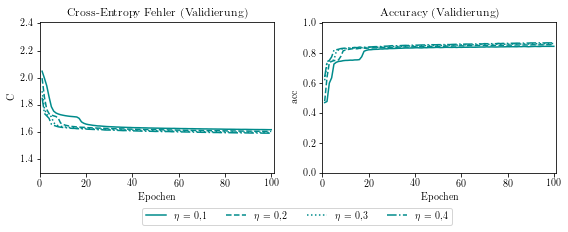

In [45]:
# Kostenfunktion und Accuracy des Validierungsdatensatzes bei unterschiedlichen 
# Lernraten

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 3))

epochs = np.arange(1,101,1)

ax1.axis([0, 101,1.3,2.41])
ax1.set_xlabel("Epochen")
ax1.set_ylabel("C")
ax1.plot(np.array(epochs), np.array(ce_val_1), color="darkcyan", linewidth=1.5, label=r"$\eta$ = 0,1")
ax1.plot(np.array(epochs), np.array(ce_val_2), color="darkcyan", linestyle="--", linewidth=1.5, label=r"$\eta$ = 0,2")
ax1.plot(np.array(epochs), np.array(ce_val_3), color="darkcyan", linestyle=":", linewidth=1.5, label=r"$\eta$ = 0,3")
ax1.plot(np.array(epochs), np.array(ce_val_4), color="darkcyan", linestyle="-.", linewidth=1.5, label=r"$\eta$ = 0,4")
ax1.set_title(r'Cross-Entropy Fehler (Validierung)')

ax2.axis([0, 101, 0, 1.01])
ax2.set_xlabel("Epochen")
ax2.set_ylabel("acc")
ax2.plot(np.array(epochs), np.array(acc_val_1), color="darkcyan", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_2), color="darkcyan", linestyle="--", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_3), color="darkcyan", linestyle=":", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_4), color="darkcyan", linestyle="-.", linewidth=1.5)
ax2.set_title(r'Accuracy (Validierung)')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc=9, bbox_to_anchor=(1.1,-0.2), ncol=4,
                      fancybox=True, prop={"family":"Computer Modern Sans serif"})

fig.tight_layout()
#fig.savefig('learning_rate_acc_ce.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### Evaluierung der Performance am Testdatensatz

Das endgültige Modell ist mit folgenden Hyperparametern spezifiziert:

- Anzahl der Hidden Layers: 2
- Anzahl der Neuronen in der 1. Hidden Layer: 300
- Anzahl der Neuronen in der 2. Hidden Layer: 100
- Optimierungsverfahren: Mini-Batch Gradient Descent
- Kostenfunktion: Cross-Entropy Fehler
- Lernrate: 0,4
- Batch Größe: 100
- Aktivierungsfunktion (Hidden Layer): ReLU Funktion
- Aktivierungsfunktion (Output Layer): Softmax Funktion
- Anzahl an Epochen: 100
- Initialisierung der Gewichte: Normalverteilung mit $\mu = 0,0$ und $\sigma = 0,05$ 
- Initialisierung der Biaswerte: Nullen

In [47]:
def neural_network(): 
    
    # Diesen Graph als Default Graph definieren.
    tf.reset_default_graph()
    
    # Pfad für die Speicherung der Log-Daten für TensorBoard 
    LOGDIR_TENSORBOARD = "/Users/annamenacher/Bachelorarbeit/TensorBoard/"
    # Pfad für die Speicherung der Daten für die Visualisierung des Cross-Entropy Fehlers
    # und Accuracy mit matplotlib
    LOGDIR_TXT_FILE = "/Users/annamenacher/Bachelorarbeit/txt_files/"
    # Ergänzung der Pfads um die endgültige Hyperparameterauswahl
    hyperparameter = "final_model/300_100neuronen_0.4eta_relu"
    
    ##############################################
    ### Hyperparamter 
    ##############################################
    
    # Lernrate
    learning_rate = 0.4
    # Anzahl der Epochen
    n_epochs = 100
    # Batch Größe n_m
    batch_size = 100
    
    # Folgende Variablen sind zwar keine Hyperparameter, aber sie sind in Verbindung mit 
    # batch_size zu definieren.
    
    # Anzahl der Beobachtungen im Trainingsdatensatz
    n_train = y_train.shape[0]
    # Anzahl der Iterationen m (m = n / n_m)
    n_batches_train = int(n_train // batch_size)
    
    ##############################################
    ### Platzhalter 
    ##############################################
    
    # Variablen für Inputs und Labels erstellen, welche erst später mit Daten gefüllt werden
    # shape: Inputs [None, 784] -> 784 Input Variablen bzw. Labels [None, 10] -> 10 Klassen
    # None ergibt sich dadurch, dass entweder Batches X_batch bzw. y_batch oder der gesamt 
    # Datensatz X_train bzw. y_train oder X_test bzw. y_test über feed_dict eingelesen werden
    
    # Platzhalter für die Inputs des jeweiligen Datensatzes (Trainings- bzw. Test-
    # datensatzes) 
    X = tf.placeholder(tf.float32, [None, 784])
    # Platzhalter für die Labels des jeweiligen Datensatzes (Trainings- bzw. Test-
    # datensatzes) 
    y = tf.placeholder(tf.float32, [None, 10])
    
    ##############################################
    ### Netzwerkarchitektur
    ##############################################
    
    # Hidden Layer 1
    with tf.name_scope("Hidden_Layer_1"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W1 = tf.Variable(tf.random_normal([784, 300], mean=0.0, stddev = 0.05, seed=123), name = 'W1')
        # Initialisierung der Biaswerte: Nullen
        b1 = tf.Variable(tf.constant(0.0, shape = [300]), name = 'b1')
        # gewichtete Inputs: z = X * W + b
        z1 = tf.add(tf.matmul(X, W1), b1)
        # Outputs der Hidden Layer: a = f(z)
        a1 = tf.nn.relu(z1)
        
    # Hidden Layer 2
    with tf.name_scope("Hidden_Layer_2"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W2 = tf.Variable(tf.random_normal([300, 200], mean=0.0, stddev = 0.05, seed=123), name = 'W2')
        # Initialisierung der Biaswerte: Nullen
        b2 = tf.Variable(tf.constant(0.0, shape = [200]), name = 'b2')
        # gewichtete Inputs: z =  a * W + b
        z2 = tf.add(tf.matmul(a1, W2), b2)
        # Outputs der Hidden Layer: a = f(z)
        a2 = tf.nn.relu(z2)
        
    # Output Layer    
    with tf.name_scope("Output_Layer"):
        # Initialisierung der Gewichte: Normalverteilung mit Mittelwer 0 und Standardabweichung 0,05
        W3 = tf.Variable(tf.random_normal([200, 10], mean = 0.0, stddev = 0.05, seed=123), name = 'W3')
        # Initialisierung der Biaswerte: Nullen
        b3 = tf.Variable(tf.constant(0.0, shape = [10]), name = 'b3')
        # gewichtete Inputs: z = a * W + b
        z3 = tf.add(tf.matmul(a2, W3), b3)
        # geschätzten Outputs der Output Layer: y_hat = f(z)
        y_hat = tf.nn.softmax(z3)
    
    ##############################################
    ### Kostenfunktion 
    ##############################################
    
    # Cross-Entropy als Kostenfunktion definieren
    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y),
                                       name = "Cross_Entropy")
        # Summaries für TensorBoard erstellen (Cross-Entropy Fehler pro Epoche)
        summ_train_ce = tf.summary.scalar("Cross_Entropy_Training", cross_entropy)
        summ_test_ce = tf.summary.scalar("Cross_Entropy_Test", cross_entropy)
    
    ##############################################
    ### Optimierungsverfahren 
    ##############################################
        
    # Mini-Batch Gradient Descent Algorithmus zur Optimierung verwenden
    with tf.name_scope("Training"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cross_entropy)
    
    ##############################################
    ### Performance-Maß 
    ##############################################
    
    # Performance-Maß Accuracy zur Evaluierung der Performance verwenden
    with tf.name_scope("Accuracy"):
        # Vektor mit geschätzten Wahrscheinlichkeiten (Outputs der Softmax Funktion) in Vektor
        # mit geschätzten Klassenzuordnungen umwandeln 
        # z.B. tf.argmax([0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.9]) = [0 0 0 0 0 0 0 0 1]
        prediction = tf.argmax(y_hat, 1)
        # Vektor mit tatsächlicher Klassenzuordnung 
        actual = tf.argmax(y, 1)
        # Anzahl an prediction = actual
        equality = tf.equal(prediction, actual)
        # Anzahl der korrekt klassifizierten Bilder / Anzahl aller Bilder in einem Datensatz 
        accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
        # Summaries für TensorBoard erstellen (Accuracy Wert pro Epoche)
        summ_train_acc = tf.summary.scalar("Accuracy_Training", accuracy)
        summ_test_acc = tf.summary.scalar("Accuracy_Test", accuracy)
    
    ##############################################
    ### TensorFlow Session
    ##############################################
    
    # Operator zuweisen, welcher alle oben definierten Variablen initialisiert
    init_op = tf.global_variables_initializer()    
    
    # Log-Daten Schreiber
    writer = tf.summary.FileWriter(LOGDIR_TENSORBOARD + hyperparameter)
    
    with tf.Session() as sess:
        
        # Variablen initialisieren
        sess.run(init_op)
        # Graph zu TensorBoard hinzufügen
        writer.add_graph(sess.graph)

        print("\nTraining beginnt!")
        
        # leere Listen für die Speicherung der Daten (Cross-Entropy und Accuracy) für die 
        # Visualisierung mit matplotlib erstellen
        ce_train = []
        ce_test = []
        acc_train = []
        acc_test = []
        
        # Schleife über alle Epochen
        for epoch in range(n_epochs):
            
            # Cross-Entropy Fehler und Accuracy Wert zu Beginn jeder Epoche gleich 0 setzen
            avg_cost = 0
            avg_acc = 0
            
            # Schleife über alle Iterationen in einer Epoche
            for i in range(n_batches_train):
                # Mini-Batches erstellen 
                X_batch, y_batch = fetch_batch(epoch, i, batch_size, n_batches_train, n_train, X_train, y_train)
                # Mini-Batch Gradient Descent Update, Cross-Entropy Fehler, Accuracy
                _, cost, acc = sess.run([optimizer, cross_entropy, accuracy], feed_dict = {X:X_batch, y: y_batch})
                # gemittelter Wert vom Cross-Entropy Fehler und Accuracy über eine Epoche
                # C = (1 / m) C_i bzw. acc = (1 / m) acc_i
                avg_cost += cost / n_batches_train
                avg_acc += acc / n_batches_train
            
            # alle 10 Epochen Fortschritt des Trainings anzeigen
            if epoch % 10 == 0:
                print("Epoch: {}, Cross-Entropy Fehler: {:.4f}, Accuracy: {:.4f}".format(epoch+10, avg_cost, avg_acc))
            
            # Speicherung der TensorBoard Summaries des Trainingsdatensatzes
            train_summ1, train_summ2 = sess.run([summ_train_ce, summ_train_acc], 
                                                feed_dict={X : X_train, y : y_train})
            writer.add_summary(train_summ1, epoch) 
            writer.add_summary(train_summ2, epoch) 
            
            # Speicherung der TensorBoard Summaries des Testdatensatzes
            test_summ1, test_summ2 = sess.run([summ_test_ce, summ_test_acc],
                                            feed_dict={X : X_test, y : y_test})
            writer.add_summary(test_summ1, epoch)
            writer.add_summary(test_summ2, epoch)
            
            # Speicherung der Daten des Trainingsdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_train = sess.run(cross_entropy, feed_dict = {X: X_train, y: y_train})
            accuracy_train = sess.run(accuracy, feed_dict = {X: X_train, y: y_train})
            
            # Befüllung der zuvor leeren Liste 
            ce_train.append(cross_entropy_train)
            acc_train.append(accuracy_train)
            
            # Speicherung als txt-Dateien
            train_ce = np.array(ce_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_ce.txt", train_ce, delimiter=",")
            train_acc = np.array(acc_train)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_train_acc.txt", train_acc, delimiter=",")
            
            # Speicherung der Daten des Testdatensatzes für die Visualisierung 
            # des Cross-Entropy Fehlers und Accuracy pro Epoche mit matplotlib
            cross_entropy_test = sess.run(cross_entropy, feed_dict = {X: X_test, y: y_test})
            accuracy_test = sess.run(accuracy, feed_dict = {X: X_test, y: y_test})
            
            # Befüllung der zuvor leeren Liste
            ce_test.append(cross_entropy_test)
            acc_test.append(accuracy_test)
            
            # Speicherung als txt-Dateien
            test_ce = np.array(ce_test)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_ce.txt", test_ce, delimiter=",")
            test_acc = np.array(acc_test)
            np.savetxt(LOGDIR_TXT_FILE + hyperparameter + "_val_acc.txt", test_acc, delimiter=",")

        # Ermittlung der endgültigen Accuracy des Testdatensatzes (über alle Beobachtungen)
        print("\nTraining beendet!")
        print(sess.run(accuracy, feed_dict={X: X_test, y: y_test}))

# Durchführung des TensorFlow Graphen
if __name__ == "__main__":
    neural_network()    


Training beginnt!
Epoch: 10, Cross-Entropy Fehler: 1.7274, Accuracy: 0.7553
Epoch: 20, Cross-Entropy Fehler: 1.4840, Accuracy: 0.9798
Epoch: 30, Cross-Entropy Fehler: 1.4719, Accuracy: 0.9903
Epoch: 40, Cross-Entropy Fehler: 1.4683, Accuracy: 0.9933
Epoch: 50, Cross-Entropy Fehler: 1.4679, Accuracy: 0.9935
Epoch: 60, Cross-Entropy Fehler: 1.4671, Accuracy: 0.9942
Epoch: 70, Cross-Entropy Fehler: 1.4661, Accuracy: 0.9951
Epoch: 80, Cross-Entropy Fehler: 1.4668, Accuracy: 0.9944
Epoch: 90, Cross-Entropy Fehler: 1.4661, Accuracy: 0.9950
Epoch: 100, Cross-Entropy Fehler: 1.4661, Accuracy: 0.9951

Training beendet!
0.978


$\textbf{TensorBoard:}$

In [ ]:
!tensorboard --logdir=/Users/annamenacher/Bachelorarbeit/TensorBoard/final_model

$\textbf{TensorBoard Graph:}$

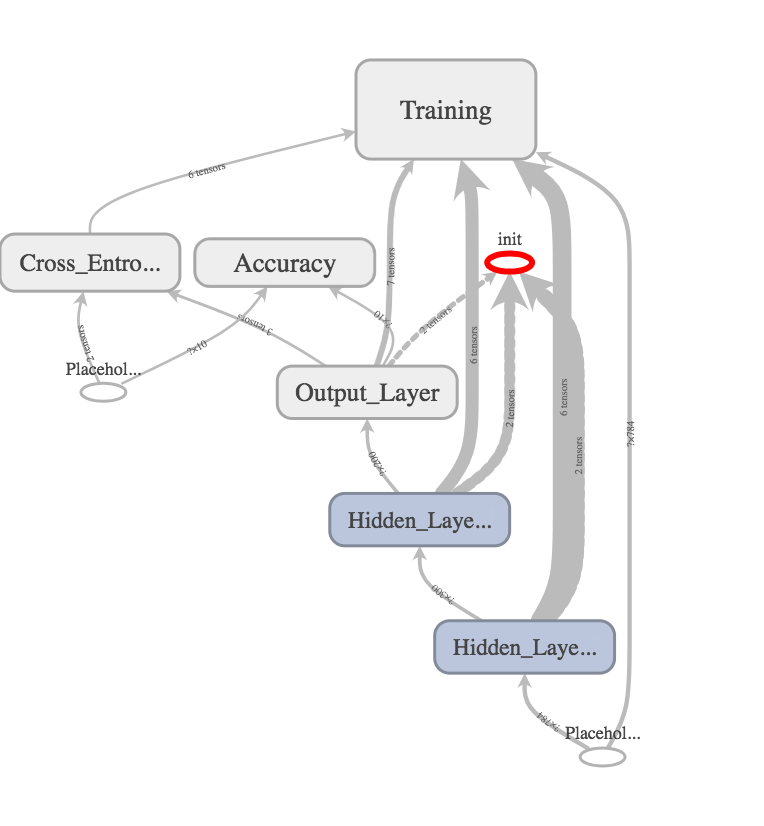

$\textbf{Visualisierung mit matplotlib:}$

In [53]:
# Pfade definieren, welcher die txt-Dateien enthalten

# Accuracy (Training)
acc_val_1_file = '/Users/annamenacher/Bachelorarbeit/txt_files/final_model/300_100neuronen_0.4eta_relu_train_acc.txt'
# Accuracy (Test)
acc_val_2_file = '/Users/annamenacher/Bachelorarbeit/txt_files/final_model/300_100neuronen_0.4eta_relu_val_acc.txt'
#Cross-Entropy (Training)
ce_val_1_file = "/Users/annamenacher/Bachelorarbeit/txt_files/final_model/300_100neuronen_0.4eta_relu_train_ce.txt"
#Cross-Entropy (Test)
ce_val_2_file = "/Users/annamenacher/Bachelorarbeit/txt_files/final_model/300_100neuronen_0.4eta_relu_val_ce.txt"

# Einlesen der Dateien

# Accuracy 
acc_val_1 = np.loadtxt(acc_val_1_file, delimiter=',')
acc_val_2 = np.loadtxt(acc_val_2_file, delimiter=',')

# Cross-Entropy 
ce_val_1 = np.loadtxt(ce_val_1_file, delimiter=',')
ce_val_2 = np.loadtxt(ce_val_2_file, delimiter=',')

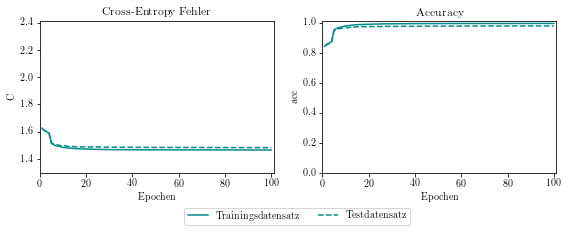

In [55]:
# Kostenfunktion und Accuracy des Trainings- und Testdatensatzes beim endgültigen Modell

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 3))

epochs = np.arange(1,101,1)

ax1.axis([0, 101,1.3,2.41])
ax1.set_xlabel("Epochen")
ax1.set_ylabel("C")
ax1.plot(np.array(epochs), np.array(ce_val_1), color="darkcyan", linewidth=1.5, label="Trainingsdatensatz")
ax1.plot(np.array(epochs), np.array(ce_val_2), color="darkcyan", linestyle="--", linewidth=1.5, label="Testdatensatz")
ax1.set_title(r'Cross-Entropy Fehler')

ax2.axis([0, 101, 0, 1.01])
ax2.set_xlabel("Epochen")
ax2.set_ylabel("acc")
ax2.plot(np.array(epochs), np.array(acc_val_1), color="darkcyan", linewidth=1.5)
ax2.plot(np.array(epochs), np.array(acc_val_2), color="darkcyan", linestyle="--", linewidth=1.5)
ax2.set_title(r'Accuracy')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc=9, bbox_to_anchor=(1.1,-0.2), ncol=2,
                      fancybox=True, prop={"family":"Computer Modern Sans serif"})

fig.tight_layout()
#fig.savefig('final_model_acc_ce.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')